# Name: Aakash Sawant    
GRIP August'21 , The SPARKS Foundation

## TASK 1 : Prediction Using Supervised Machine Learning

#### In This Simple Linear Regression Task we Predict the percentage of an student based on the no. of study hours. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [2]:
# Reading the Data 
score = pd.read_csv('http://bit.ly/w-data')
score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
score.isnull().sum()


Hours     0
Scores    0
dtype: int64

#### There is no null value in the Dataset so, we can now visualize our Data.



In [4]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


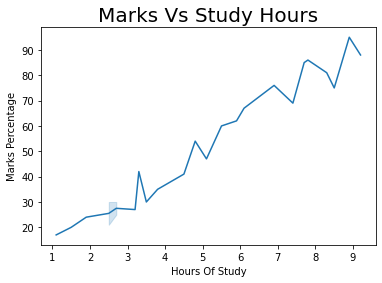

In [5]:
sns.lineplot(y= score['Scores'], x= score['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Of Study', size=10)
plt.show()


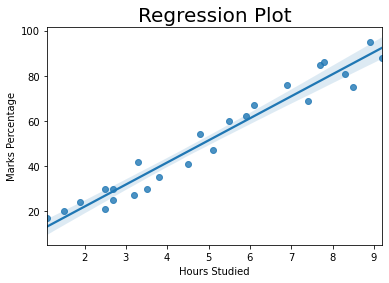

In [6]:
sns.regplot(x= score['Hours'], y= score['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

In [9]:
#selecting the Input Variable
X = score.iloc[:, :-1].values  
X.shape

(25, 1)

In [10]:
#Storing the Output
y = score.iloc[:, 1].values


In [11]:
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


In [12]:
#Fitting the Data 
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


### Predicting the Percentage of Marks


In [18]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [a for a in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [17]:
#Comparing Actual and Predicted Marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


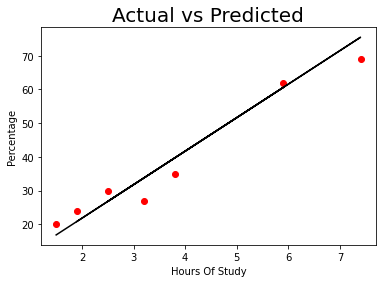

In [21]:
#Visualising the Actual and Predicted Marks

plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage', size=10)
plt.xlabel('Hours Of Study', size=10)
plt.show()

In [22]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


## What will be predicted score if a student studies for 9.25 hrs/ day? 


In [27]:
hours = [9.25]
answer = regression.predict([hours])
print(f'Score =',answer)

Score = [93.89272889]


## According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 % .